# MA755 - Team Sandbox

Matrial adapted from Google's TensorFlow documentation.

Annotations, comments, and implementation on dataset by Angela Su, Tyler Miguel, Sebastian Bury

# Introduction

Deep learning is a domain within machine learning that is focused on building algorithms that resemble the structure of the brain. This structure is an Artificial Neural Network (ANN) and is the base of deep learning algorithms, in which they take an input, apply a function(s) and return an output (usually a prediction).

In this notebook we applied image recognition using a Convolutional Neural Network (CNN) to train a model to classify images of cats and dogs to ultimately predict the contents of an unseen image of a cat or dog. The application of a CNN is modeled after the structure of a visual cortex. The visual cortex contains a complex arrangement of cells that are sensitive to small sub-regions of the visual field, called a receptive field. The sub-regions are tiled to cover the entire visual field. These cells act as local filters over the input space and are well-suited to exploit the strong spatially local correlation present in natural images. Additionally, CNN are a form of multilayer perceptrons (MLP) which make them good algorithms to learn non-linear patterns.

A CNN takes a set of inputs in the input layer and transforms them within the hidden layers until it reaches the output layer. The hidden layers are responsiple for filtering the inputs to produce the strongest response to a spatially local input pattern. The receptive fields partially overlaps to create a visual field with a constant weight vector and bias which create a feature map. Each hidden layer is made up of many feature maps. 

The main layers in a CNN are the convolutional and pooling layers. The convolutional layer, in image recognition, contains neurons that are connected to the pixels in the repective field in the previous layer (now the whole image). This allows the the algorithm to concentrate on low-level features and pass them onto the next layer to be reconstructed into higher-level features. The pooling layers shrink the input image to reduce computation, memory, and number of parameters. 

Overall, the CNN takes an input, passes it to a convolutional layer, then an activation layer (typically ReLU), then a pooling layer. This process is repeated until the image reaches the end of the network where it enteres a feedforward network that is made up of fully connected layers and a final layer that outputs probabilities, in terms of the classification.  

We will walk through a simple example using Google's TensorFlow documentation and data from Kaggle's repository.

Throughout this notebook there are warnings from tensorflow and deprecation warnings, neither of these impact our model or it's predictions and are known bugs in tensorflow or issues with the version of a package we have installed on our machines. 

# Load Libraries 

Below are the libraries that we will use to build this algorithm.

In [1]:
from __future__ import division, print_function, absolute_import
from skimage import color, io
from scipy.misc import imresize
import numpy as np
import tensorflow as tf
from tensorflow.contrib import learn
from tensorflow.contrib.learn.python.learn.estimators import model_fn as model_fn_lib
from sklearn.model_selection import train_test_split
import os
from glob import glob
from IPython.display import Image 
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# Import Data

The data we will use can be can be downloaded on the [Kaggle](https://www.kaggle.com/c/dogs-vs-cats/data) website. There you will find a training and test set. The training set has 25,000 images of cats and dogs that can be used to train the model. Given that this is a toy example for implementation, we will only use the training data to train and test the algorithm.

The image classification are denoted by begining of the image name. For cats, the image name starts with "cat..." and for dogs the image name starts with "dog...". To split our data and build our label data we will point to the file directory, extract the names of the files and split them into the objects `cat_files` and `dog_files`.

In [2]:
files_path = 'train/'

In [3]:
cat_files_path = os.path.join(files_path, 'cat.*.jpg')
dog_files_path = os.path.join(files_path, 'dog.*.jpg')

In [4]:
cat_files = sorted(glob(cat_files_path))
dog_files = sorted(glob(dog_files_path))

In [5]:
n_files = len(cat_files) + len(dog_files)
print(n_files)

25000


Printing `n_files` shows us that we have 25,000 images between our two objects.

# Take a look at the data

We can directly look at a image within our data. By using the `Image` function, and the file path, we can call the jpg image and print it to our notebook. Below is the first cat image in our dataset.

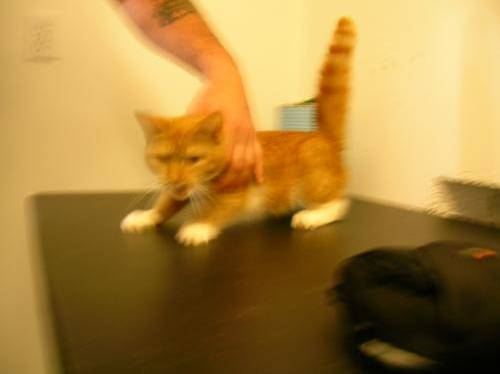

In [6]:
Image(filename=files_path+'/cat.0.jpg')

We can also see the first dog image in our dataset using the same method. As a reminder, all the images are located in the same directory.

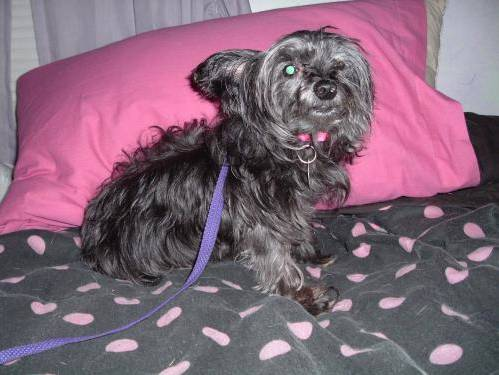

In [7]:
Image(filename=files_path+'/dog.0.jpg')

# Resize images

Our intial dataset has images of all sizes. This won't well for our network. We will first look to resize the images to 28x28 pixels. Given that our Additionally, we will extract build the label data `ally` by counting the images in `cat_files`. We will do the same for the images in `dog_files` too. Additionally, we will be using 3 color channels for these images.

Before doing this, we will intialize our variables `allX` and `ally` to prepare to take on the new values.

In [8]:
size_image = 28

allX = np.zeros((n_files, size_image, size_image, 3), dtype='float32')
ally = np.zeros(n_files, dtype='int32')
count = 0
for f in cat_files:
    try:
        img = io.imread(f)
        new_img = imresize(img, (size_image, size_image, 3))
        allX[count] = np.array(new_img)
        ally[count] = 0
        count += 1
    except:
        continue

In [9]:
for f in dog_files:
    try:
        img = io.imread(f)
        new_img = imresize(img, (size_image, size_image, 3))
        allX[count] = np.array(new_img)
        ally[count] = 1
        count += 1
    except:
        continue

# Convolution layer

As we mentioned earlier, the CNN will take an input (image) and pass it to a convolution layer which uses receptive fields to scan over the image and create several feature maps. Before passing the image through to the convolution layer we will take a look at the dimensions of the image.

In [10]:
np.array(allX[0:2], dtype=np.float32).shape

(2, 28, 28, 3)

We can see there are 4 dimensions. This is a 4D tensor that represents [number of images, pixel length, pixel width, color channels]. We can see that our images have 28x28 pixel size. We will only use the first two images and break up the tuple below to extract the information that we will use to construct our first convolution layer. Then we will create a two filters using a vertical and horizontal line.

In [11]:
data_point = np.array(allX[0:2], dtype=np.float32)
batch_size, height, width, channels = (data_point.shape)

In [12]:
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32) 
filters[:, 3, :, 0] = 1 # vertical line
filters[3, :, :, 1] = 1 # horizontal line

Now that we have our filter, we will build the compute graph that will compute the convolutional layer and print out the results.

In [13]:
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
convolution = tf.nn.conv2d(X, filters, strides=[1,2,2,1], padding="SAME")

with tf.Session() as sess:
    output = sess.run(convolution, feed_dict={X: data_point})

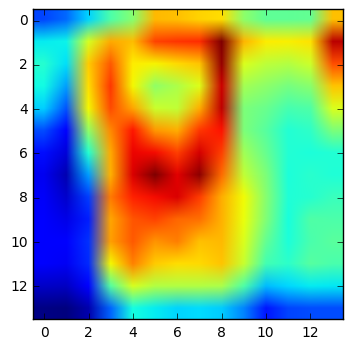

In [14]:
plt.imshow(output[1, :, :, 0])
plt.show()

We can see the reults of the convolutional layer. The image above is the first feature map of the second image. We can compare this image with the input image below. We can sort of see the resemblance.

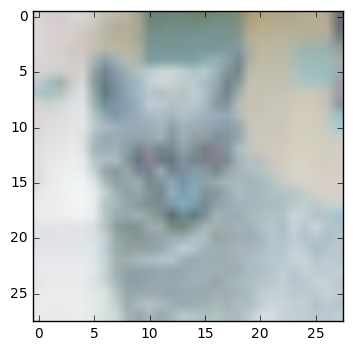

In [15]:
plt.imshow(allX[1])
plt.show()

Below is the original image given in our training dataset.

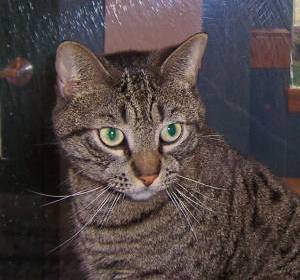

In [16]:
Image(filename=files_path+'/cat.1.jpg')

# Pooling layer

Similiar to the convolution layer, we will construct a pooling layer. In this example, the CNN will take an input (image) and pass it to a pooling layer. This sub-sampled pooling layer will ultimately shrink the image's to make it more manageable in our network. The `max_pool` function means that only the maximum value within the sub-sample will make it to the next layer. This helps to condense our image.

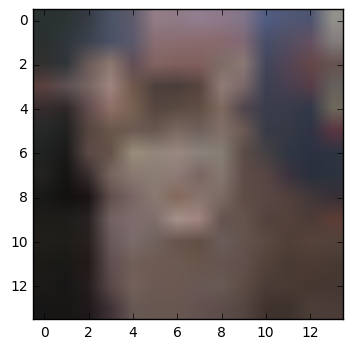

In [17]:
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
max_pool = tf.nn.max_pool(X, ksize=[1,2,2,1], strides=[1,2,2,1],padding="VALID")

with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict={X: data_point})

plt.imshow(output[1].astype(np.uint8)) 
plt.show()

We can see that the image closely resmbles the original image.

# Split the data

We split the data into train and test tests as usual in order to evaluate the model on unseen data. 

In [18]:
from tensorflow.contrib.layers import fully_connected

In [19]:
X, X_test, Y, Y_test = train_test_split(allX, ally, test_size=0.1, random_state=42)

In [20]:
# from google https://www.tensorflow.org/tutorials/layers

# Convolutional Neural Network

The CNN function takes the feature data, labels, and model mode (either training, evluation, or interfence) as parameters. After configuring the CNN through the layers, it outputs preduction, loss and a training operation.

## Layers

The layers expect input tensors to have a particular shape, [batch_size, image_switch, image_hight, channels.] Batch size is for the subset of examples used when performing gradient descent during training. Weight and height are that of the example images. Channels describes the number of color channels in the images (color images have 3 and monochrome have 1.) input_layer sets the batch size to -1 to dynamically compute the dimension based on the features, the images are reshaped to 28x28 pixels, and the images are RGB with 3 color channels. 

The first convolutional layer has 32 filters that have dimension 5x5 as specified by kernel_size on the input layer. There is a ReLU activation function to speed up the training. Since the output tensor should ahve the same dimensions as the input, padding is set to same.

The first pooling layer connects to the convolutional layer from above. max_pooling2d() creates a layer max pooling which has a 2x2 filter, halving the height and width. Strides is 2 which means the filter is separated by 2 pixels in the dimensions to prevent overlapping. 

The second convolutional and pooling layers follow with similar syntax.

The dense layer has 1024 neurons and ReLU activation. This allows the CNN classifiations on the features frm the layers. The feature map is flattened to reduce the tensor dimensions to 2. The features dimension should be 7 * 7 * 64 to account for the examples with 7 from the pool2 width, 7 from the pool2 heiht. and 64 from the pool2 channels. The dropout method helps improve the results, with rate=0.4 meaning 40% of the elements will be dropped in training.  

The logitis layer returns the values of the predictions by creating a dense layer with 2 neurons, one for cat and one for dog.

## Loss and Optimization

The loss function judges the model's predictions vs the target classes. One hot coding is performed to change the labels to 0s and 1s. Depth is 2 because there are 2 target classes.

We configure the model to optimize the loss value from training. The learning rate is 0.0001 with stochastic gradient descent. We generate predictions with the predicted class and the probability that it is a dog and a cat. We can find the predicted class from the logitis tensor with the highest value by indexing it with argmax. The probabilities are from the softmax activation. Finally we compute the predictions in a dictionary and return the predictions, loss, train_op, and mode. 

In [21]:
tf.reset_default_graph()

def cnn_model_fn(features, labels, mode):
    """Model function for CNN."""
    # Input Layer
    input_layer = tf.reshape(features, [-1, 28, 28, 3])
      # Convolutional Layer #1
    conv1 = tf.layers.conv2d(
        inputs=input_layer,
        filters=32,
        kernel_size=[5, 5],
        padding="same",
        activation=tf.nn.relu)
    
    # Pooling Layer #1
    pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)
    
    # Convolutional Layer #2 and Pooling Layer #2
    conv2 = tf.layers.conv2d(
        inputs=pool1,
        filters=64,
        kernel_size=[5, 5],
        padding="same",
        activation=tf.nn.relu)
    
    pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)
    
    # Dense Layer
    pool2_flat = tf.reshape(pool2, [-1, 7 * 7 * 64])
    dense = tf.layers.dense(inputs=pool2_flat, units=1024, activation=tf.nn.relu)
    dropout = tf.layers.dropout(
        inputs=dense, rate=0.4, training=mode == learn.ModeKeys.TRAIN)
    
    # Logits Layer
    logits = tf.layers.dense(inputs=dropout, units=2)
    
    loss = None
    train_op = None
    
    # Calculate Loss (for both TRAIN and EVAL modes)
    if mode != learn.ModeKeys.INFER:
        onehot_labels = tf.one_hot(indices=tf.cast(labels, tf.int32), depth=2)
        loss = tf.losses.softmax_cross_entropy(
            onehot_labels=onehot_labels, logits=logits)
        
    # Configure the Training Op (for TRAIN mode)
    if mode == learn.ModeKeys.TRAIN:
        train_op = tf.contrib.layers.optimize_loss(
            loss=loss,
            global_step=tf.contrib.framework.get_global_step(),
            learning_rate=0.001,
            optimizer="SGD")

    # Generate Predictions
    predictions = {
        "classes": tf.argmax(
            input=logits, axis=1),
        "probabilities": tf.nn.softmax(
            logits, name="softmax_tensor")
    }
    # Return a ModelFnOps object
    return model_fn_lib.ModelFnOps(
        mode=mode, predictions=predictions, loss=loss, train_op=train_op)

We create an estimator for our model which helps with training, evaluation, and inference. The model data is saved in a temp directory.   

In [22]:
cd_classifier = learn.Estimator(
      model_fn=cnn_model_fn, model_dir="/tempformodel_1")

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_keep_checkpoint_max': 5, '_save_checkpoints_secs': 600, '_tf_random_seed': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002704C72EDD8>, '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_task_id': 0, '_num_ps_replicas': 0, '_master': '', '_is_chief': True, '_environment': 'local', '_model_dir': None, '_evaluation_master': '', '_task_type': None, '_num_worker_replicas': 0, '_save_summary_steps': 100, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
}


We set up a loggings hook to keep track of training progress with the probabilities from the softmax layer. Tensors to log are stored in a dictionary and are logged every 50 steps.

In [23]:
tensors_to_log = {"probabilities": "softmax_tensor"}
logging_hook = tf.train.LoggingTensorHook(
    tensors=tensors_to_log, every_n_iter=50)

We train the model and give it a batch size of 10 and 1000 steps total. This means it will train 10 examples every step.

In [24]:
cd_classifier.fit(
    x=X,
    y=Y,
    batch_size=10,
    steps=1000,
    monitors=[logging_hook])

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))


C:\Users\Sebastian\Anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py:248: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tempformodel_1\model.ckpt.
INFO:tensorflow:loss = 9.37265, step = 1
INFO:tensorflow:probabilities = [[ 0.58407104  0.41592899]
 [ 1.          0.        ]
 [ 0.99718899  0.00281101]
 [ 0.00000018  0.99999988]
 [ 0.00000035  0.99999964]
 [ 1.          0.        ]
 [ 0.00000002  1.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]]
INFO:tensorflow:probabilities = [[ 0.48935023  0.5106498 ]
 [ 0.84730136  0.15269864]
 [ 0.50931245  0.49068758]
 [ 0.5361315   0.4638685 ]
 [ 0.55474484  0.44525516]
 [ 0.49282414  0.5071758 ]
 [ 0.56373096  0.43626904]
 [ 0.4357312   0.56426883]
 [ 0.63620812  0.36379191]
 [ 0.36536878  0.63463128]] (3.551 sec)
INFO:tensorflow:global_step/sec: 13.1421
INFO:tensorflow:loss = 0.652415, step = 101 (7.611 sec)
INFO:tensorflow:probabilities = [[ 0.57132959  0.42867041]
 [ 0.65072912  0.34927085]
 [ 0.52834743  0.47165257]
 [ 0.45007652

Estimator(params=None)

We evaluate the model to see how accurate it is at classifying cats and dogs with metrics. We print the results which evaluate the feature data and labels. 

In [25]:
metrics = {
    "accuracy":
        learn.MetricSpec(
            metric_fn=tf.metrics.accuracy, prediction_key="classes"),
}

In [26]:
eval_results = cd_classifier.evaluate(
    x=X_test, y=Y_test, metrics=metrics)

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))


C:\Users\Sebastian\Anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py:248: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


INFO:tensorflow:Starting evaluation at 2017-05-11-09:22:12
INFO:tensorflow:Restoring parameters from /tempformodel_1\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2017-05-11-09:22:17
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.5492, global_step = 1000, loss = 0.68481


Here we print the evaluation results in a more readable format.

In [27]:
print(eval_results)

{'loss': 0.68481034, 'accuracy': 0.5492, 'global_step': 1000}


We see that we have a loss of 0.6848 and an accuracy of 0.5492. We could most likely improve this model by increasing the number of layers in the model or increasing the size of the pictures we used.

Here we run the test set against the model we have created.

In [29]:
predictions = cd_classifier.predict(X_test, as_iterable=True)

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))


C:\Users\Sebastian\Anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py:248: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


INFO:tensorflow:Restoring parameters from /tempformodel_1\model.ckpt-1000


Below we iterate through the test set of 2500 pictures and print the predicted class and the probability the model has for that prediction.

In [30]:
for i, p in enumerate(predictions):
  print("Prediction %s: Class %s Probability %s" % (i + 1, p["classes"], p["probabilities"]))

Prediction 1: Class 1 Probability [ 0.49280623  0.50719374]
Prediction 2: Class 0 Probability [ 0.90704185  0.09295809]
Prediction 3: Class 0 Probability [ 0.6505084  0.3494916]
Prediction 4: Class 1 Probability [ 0.46898663  0.53101343]
Prediction 5: Class 0 Probability [ 0.72451699  0.27548298]
Prediction 6: Class 0 Probability [ 0.54671794  0.45328203]
Prediction 7: Class 1 Probability [ 0.48680544  0.51319462]
Prediction 8: Class 1 Probability [ 0.45159939  0.54840058]
Prediction 9: Class 1 Probability [ 0.49229461  0.50770539]
Prediction 10: Class 1 Probability [ 0.45183977  0.54816025]
Prediction 11: Class 1 Probability [ 0.48756376  0.51243627]
Prediction 12: Class 1 Probability [ 0.48391753  0.51608241]
Prediction 13: Class 1 Probability [ 0.43058884  0.56941122]
Prediction 14: Class 1 Probability [ 0.49821195  0.50178808]
Prediction 15: Class 1 Probability [ 0.48556215  0.51443785]
Prediction 16: Class 1 Probability [ 0.48518848  0.51481152]
Prediction 17: Class 1 Probability 

# Conclusion

Our CNN had an accuracy of 56%, which is better than a random guess. The problem of correctly classifying cat and dogs in images presents challenges-- for example we had to consider 3 color channels, which was not the case for the MNIST data set example. We resized the 25,000 training images to 28x28 pixel images in order to speed up the training, but even to the human eye these compressed images had information and detail loss that made it more difficult to distinguish as cats or dogs. With more time we could use larger pictures to hopefully increase our accuracy, or increase the number of layers in the model which could help the accuracy as well. 

In 2007, experts in the field claimed that a computer would not be able to surpass 60% accuracy for this type of classification, but now we are nearly there with a simple CNN implementation in TensorFlow. Deep learning and tools like TensorFlow continue to help us quickly train models from large datasets and improve the accuracy of predictions. In the current state of technology, computer vision such as the one utilized for Facebook facial recognition is already better at recognizing faces than humans on average. The technology will continue to improve in the future with advantage in deep learning and open source development in the tech community. 